# The simplest example: a homogeneous glass layer in air

Berreman4x4 example
Author: O. Castany, M. Müller

In [1]:
import numpy as np
import elli
import matplotlib.pyplot as plt

In [2]:
# Materials:
air = elli.AIR
glass = elli.IsotropicMaterial(elli.ConstantRefractiveIndex(1.5))

# Layer and half-spaces:
layer = elli.Layer(glass, 1)
front = back = air

# Structure:
s = elli.Structure(front, [layer], back)

In [3]:
# Wavelength and wavenumber:
lbda = 1000  # nm

# Incidence angle:
angle = 30

In [4]:
# Variation of the reflexion and transmission coefficients with the
# thickness of the glass layer:
h_list = np.linspace(0, 1000, 1000)

data = elli.ResultList()

for h in h_list:
    layer.set_thickness(h)
    data.append(s.evaluate(lbda, angle))

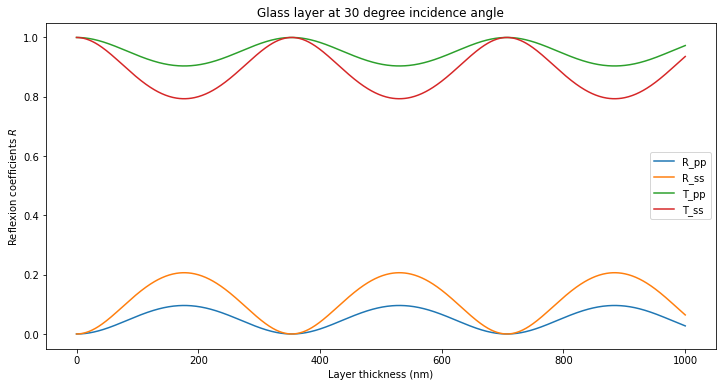

In [5]:
plt.figure(figsize=(12.0, 6.0))
plt.plot(h_list, data.R_pp, label="R_pp")
plt.plot(h_list, data.R_ss, label="R_ss")
plt.plot(h_list, data.T_pp, label="T_pp")
plt.plot(h_list, data.T_ss, label="T_ss")
plt.title("Glass layer at 30 degree incidence angle")
plt.xlabel("Layer thickness (nm)")
plt.ylabel(r"Reflexion coefficients $R$")
plt.legend()
plt.show()